<a href="https://colab.research.google.com/github/junhuk1113/AIAD_weather/blob/master/ensamble_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble base weather prediction

## Feel free to ask doubts, give suggestions and upvote if you like my work :)

## Importing files

In [29]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (3,943 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [34]:
"""
from matplotlib import font_manager, rc
font_path = '/content/drive/MyDrive/PBL_Shared_Data/csv folder/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)
"""

"\nfrom matplotlib import font_manager, rc\nfont_path = '/content/drive/MyDrive/PBL_Shared_Data/csv folder/malgun.ttf'\nfont_name = font_manager.FontProperties(fname = font_path).get_name()\nrc('font', family=font_name)\n"

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/PBL_Shared_Data/csv_folder/2015seoul_2.csv', encoding='cp949')

## Let's explore training data

In [ ]:
df.head()

,val1,val2,val3,val4,val5,val6,val7,val8,val9,val10,val11,val12
0,108,NaN,NaN,-7.4,33.0,1011.8,1023.0,NaN,NaN,NaN,NaN,-4.5
1,108,NaN,NaN,-8.0,35.0,1011.7,1022.9,NaN,NaN,NaN,NaN,-5.1
2,108,NaN,NaN,-8.4,37.0,1012.1,1023.3,NaN,NaN,0.0,0.0,-5.5
3,108,NaN,NaN,-8.8,35.0,1012.3,1023.6,NaN,NaN,0.0,0.0,-5.9
4,108,NaN,NaN,-9.1,35.0,1011.8,1023.1,NaN,NaN,0.0,0.0,-6.3


In [ ]:
df.describe()

,val1,val2,val3,val4,val5,val6,val7,val8,val9,val10,val11,val12
count,8736.0,0.0,0.0,8736.000000,8706.000000,8736.000000,8736.000000,4585.000000,4766.000000,6641.000000,6787.000000,8699.000000
mean,108.0,NaN,NaN,13.649382,59.593326,1006.009421,1016.261996,0.518953,0.968678,4.733323,2.947989,15.276675
std,0.0,NaN,NaN,10.598643,20.146836,8.151863,8.547865,0.449389,0.825291,3.935258,3.177865,12.465613
min,108.0,NaN,NaN,-12.900000,9.000000,977.700000,987.200000,0.000000,0.000000,0.000000,0.000000,-8.900000
25%,108.0,NaN,NaN,4.500000,45.000000,999.400000,1009.300000,0.000000,0.230000,0.000000,0.000000,4.000000
50%,108.0,NaN,NaN,14.700000,60.000000,1006.000000,1016.200000,0.600000,0.780000,5.000000,2.000000,15.000000
75%,108.0,NaN,NaN,22.900000,75.000000,1012.300000,1022.900000,1.000000,1.580000,8.000000,6.000000,24.100000
max,108.0,NaN,NaN,35.700000,100.000000,1026.400000,1037.400000,1.000000,3.200000,10.000000,10.000000,57.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1827a37610>,
      dtype=object)

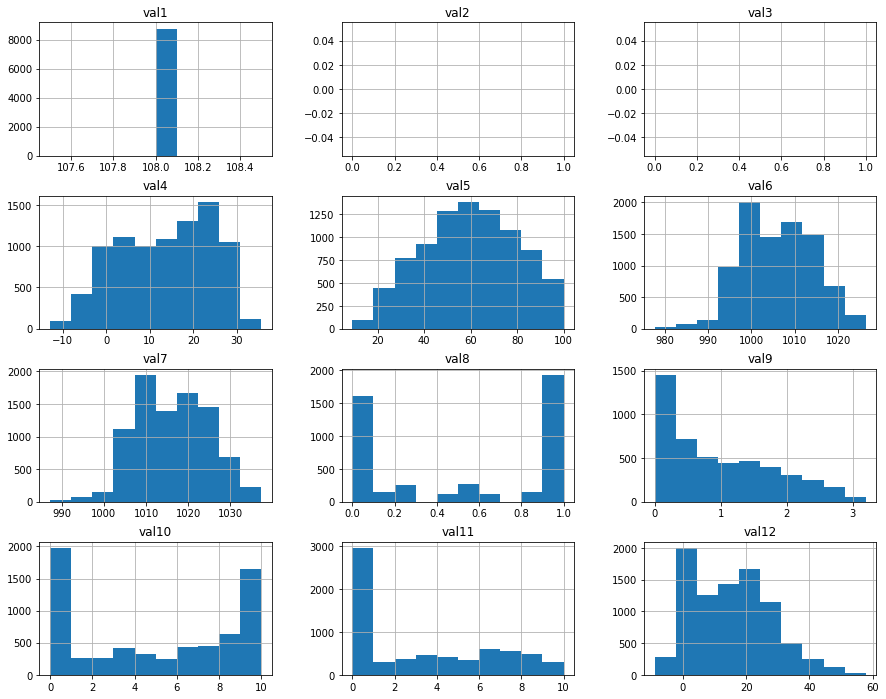

In [ ]:
df.hist(figsize=(15,12))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   val1    8736 non-null   int64  
 1   val2    0 non-null      float64
 2   val3    0 non-null      float64
 3   val4    8736 non-null   float64
 4   val5    8706 non-null   float64
 5   val6    8736 non-null   float64
 6   val7    8736 non-null   float64
 7   val8    4585 non-null   float64
 8   val9    4766 non-null   float64
 9   val10   6641 non-null   float64
 10  val11   6787 non-null   float64
 11  val12   8699 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 819.1 KB


In [ ]:
df.dropna

<bound method DataFrame.dropna of       val1  val2  val3  val4  val5    val6    val7  val8  val9  val10  val11  \
0      108   NaN   NaN  -7.4  33.0  1011.8  1023.0   NaN   NaN    NaN    NaN   
1      108   NaN   NaN  -8.0  35.0  1011.7  1022.9   NaN   NaN    NaN    NaN   
2      108   NaN   NaN  -8.4  37.0  1012.1  1023.3   NaN   NaN    0.0    0.0   
3      108   NaN   NaN  -8.8  35.0  1012.3  1023.6   NaN   NaN    0.0    0.0   
4      108   NaN   NaN  -9.1  35.0  1011.8  1023.1   NaN   NaN    0.0    0.0   
...    ...   ...   ...   ...   ...     ...     ...   ...   ...    ...    ...   
8731   108   NaN   NaN   1.6  93.0  1016.1  1026.9   NaN   NaN   10.0    4.0   
8732   108   NaN   NaN   1.6  93.0  1016.0  1026.8   NaN   NaN   10.0    5.0   
8733   108   NaN   NaN   1.5  93.0  1016.1  1027.0   NaN   NaN    NaN    NaN   
8734   108   NaN   NaN   1.2  94.0  1016.2  1027.1   NaN   NaN   10.0    6.0   
8735   108   NaN   NaN   1.0  95.0  1016.1  1027.0   NaN   NaN   10.0    4.0   

     

## Column ITEM WEIGHT and OUTLET SIZE contain missing values. 

## Lets see correlation b/w target and features

In [ ]:
corr_matrix=df.corr()
corr_matrix['val1']

val1    NaN
val2    NaN
val3    NaN
val4    NaN
val5    NaN
val6    NaN
val7    NaN
val8    NaN
val9    NaN
val10   NaN
val11   NaN
val12   NaN
Name: val1, dtype: float64

## ITEM_MRP seems to have a good correlation with targeted ITEM_OUTLET_SALES and other columns are not very useful for prediction of target value

## Lets start checking columns relation with Target ITEM_OUTLET_SALES Price
## First is ITEM_IDENTIFIER

In [47]:
df.val1.value_counts('val1')

108    1.0
Name: val1, dtype: float64

In [48]:
df.val2.value_counts('val2')

Series([], Name: val2, dtype: float64)

In [49]:
df.val3.value_counts('val3')

Series([], Name: val3, dtype: float64)

In [50]:
df.val4.value_counts('val4')

 25.6    0.005609
 23.0    0.005037
 24.5    0.004922
 25.2    0.004922
 24.6    0.004808
           ...   
-11.9    0.000114
-11.7    0.000114
-11.2    0.000114
-10.5    0.000114
-9.4     0.000114
Name: val4, Length: 461, dtype: float64

In [51]:
df.val5.value_counts('val5')

67.0    0.019412
49.0    0.018952
60.0    0.018838
63.0    0.018838
58.0    0.018034
          ...   
12.0    0.000115
9.0     0.000115
10.0    0.000115
73.1    0.000115
60.4    0.000115
Name: val5, Length: 94, dtype: float64

In [52]:
df.val6.value_counts('val6')

999.1     0.006181
1000.1    0.005838
997.8     0.005838
996.4     0.005723
998.3     0.005723
            ...   
984.7     0.000114
984.8     0.000114
986.0     0.000114
992.0     0.000114
1023.9    0.000114
Name: val6, Length: 431, dtype: float64

In [53]:
df.val7.value_counts('val7')

1008.3    0.006410
1019.6    0.006181
1019.8    0.005952
1007.2    0.005952
1011.3    0.005838
            ...   
1035.6    0.000114
1001.7    0.000114
995.0     0.000114
998.0     0.000114
1037.4    0.000114
Name: val7, Length: 447, dtype: float64

In [54]:
df.val8.value_counts('val8')

1.0    0.378626
0.0    0.351145
0.9    0.042312
0.8    0.031625
0.1    0.031189
0.5    0.030534
0.3    0.029226
0.2    0.027699
0.6    0.027045
0.7    0.025954
0.4    0.024646
Name: val8, dtype: float64

In [55]:
df.val1.value_counts('val9')

108    1.0
Name: val1, dtype: float64

In [56]:
df.val10.value_counts('val10')

0.0     0.297395
10.0    0.186418
8.0     0.096371
7.0     0.067159
6.0     0.065803
3.0     0.061738
9.0     0.061437
4.0     0.048938
2.0     0.039452
1.0     0.039000
5.0     0.036290
Name: val10, dtype: float64

In [57]:
df.val11.value_counts('val11')

0.0     0.435981
6.0     0.087815
7.0     0.083247
8.0     0.071607
3.0     0.066745
4.0     0.061441
2.0     0.052895
5.0     0.050390
1.0     0.044792
9.0     0.033888
10.0    0.011198
Name: val11, dtype: float64

In [58]:
df.val12.value_counts('val12')

 0.2     0.022186
 0.0     0.014369
 0.3     0.009886
 0.1     0.009656
-0.1     0.006667
           ...   
 48.9    0.000115
 49.1    0.000115
 47.9    0.000115
 52.2    0.000115
 46.1    0.000115
Name: val12, Length: 601, dtype: float64

## From above output we can say that ITEM_IDENTIFIER should be categorical columns
## Since ITEM_WEIGHT column correlation strength is very low so we can drop it
## Next Column is ITEM_FAT_CONTENT

In [ ]:
df.val2.value_counts('val2')

Series([], Name: val2, dtype: float64)

## LF, low fat belong to same category that is Low Fat and reg belong to Regular category so replacing LF, low fat and reg to thier category by

In [ ]:
df.val1=df.Item_Fat_Content.replace('LF','Low Fat')

AttributeError: ignored

In [ ]:
df.Item_Fat_Content=df.Item_Fat_Content.replace('reg','Regular')
df.Item_Fat_Content=df.Item_Fat_Content.replace('low fat','Low Fat')

In [ ]:
df.Item_Fat_Content.value_counts()

AttributeError: ignored

## For further data processing we need to convert column type into their correct type

In [ ]:
df.Item_Identifier=df.Item_Identifier.astype('category')
df.Item_Fat_Content=df.Item_Fat_Content.astype('category')
df.Item_Type=df.Item_Type.astype('category')
df.Outlet_Identifier=df.Outlet_Identifier.astype('category')
df.Outlet_Establishment_Year=df.Outlet_Establishment_Year.astype('int64')

df.Outlet_Type=df.Outlet_Type.astype('category')
df.Outlet_Location_Type=df.Outlet_Location_Type.astype('category')
df.Outlet_Size=df.Outlet_Size.astype('category')

AttributeError: ignored

## Now ITEM_MRP column. Correlation strength of this column with target column is very high so we need can exploit this column for further infomation about target column

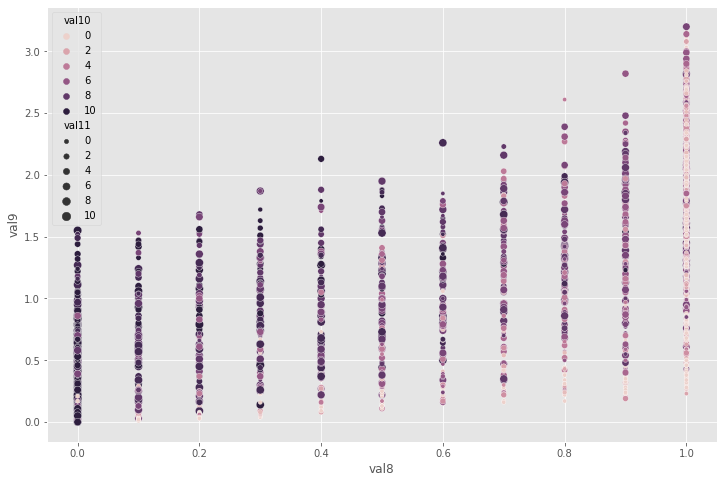

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='val8',y='val9',hue='val10',size='val11',data=df)

## ITEM_MRP column contain prices which are in clusters so it would be better if we convert this columnn into bins for further processing

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


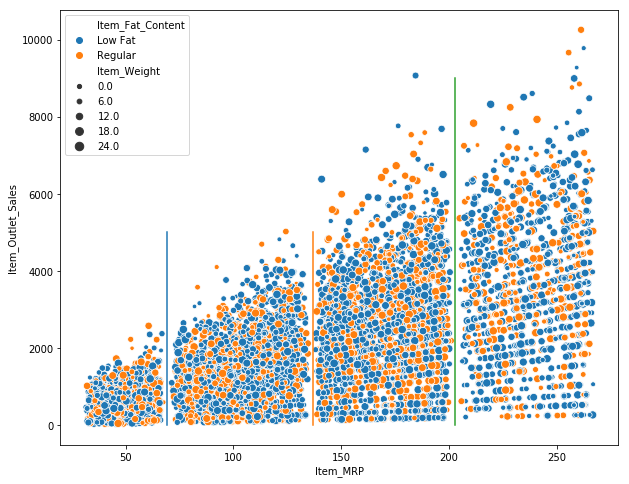

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df)
plt.plot([69,69],[0,5000])
plt.plot([137,137],[0,5000])
plt.plot([203,203],[0,9000])

## We can use these perpendicular lines to divide data into proper bins. So from above graph we got out bin value. Now

In [ ]:
df.Item_MRP=pd.cut(df.Item_MRP,bins=[25,69,137,203,270],labels=['a','b','c','d'],right=True)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,d,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,c,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,c,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,a,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Now lets explore other columns

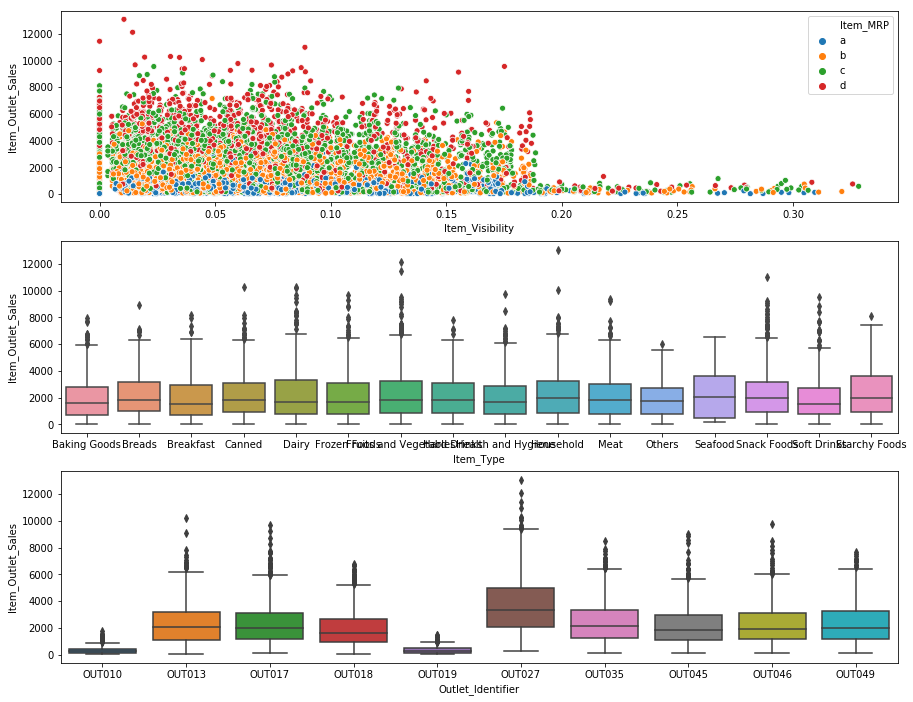

In [ ]:
fig,axes=plt.subplots(3,1,figsize=(15,12))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0],data=df)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=df)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=df)

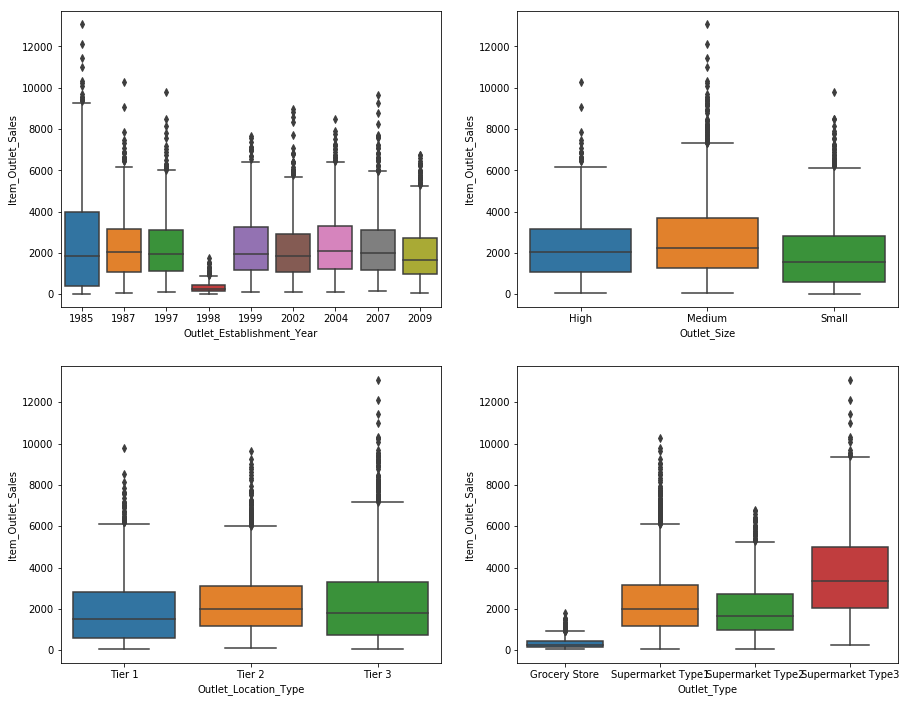

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=df)

## From above plots we can say that we can drop ITEM_VISIBILiTY along with ITEM_WEIGHT . Further more both of these column have very low correlation strength with target column.

## Therefore Columns for model training will be

In [ ]:
attributes=['Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier','Item_Type','Item_Outlet_Sales']

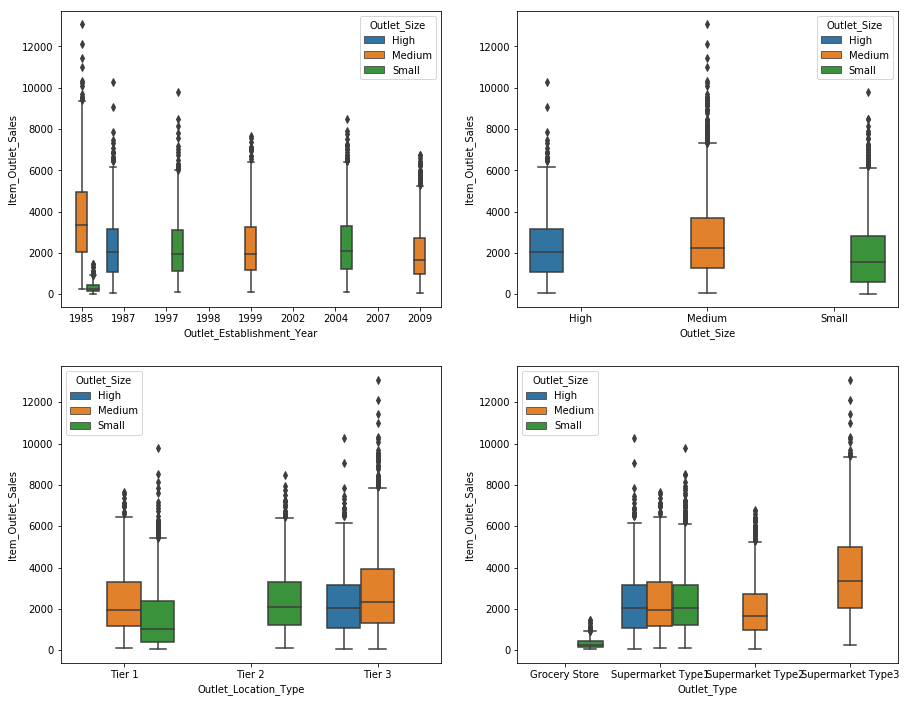

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,0],data=df)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,1],data=df)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,0],data=df)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,1],data=df)

In [ ]:
data=df[attributes]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
Item_MRP                     8523 non-null category
Outlet_Type                  8523 non-null category
Outlet_Location_Type         8523 non-null category
Outlet_Size                  6113 non-null category
Outlet_Establishment_Year    8523 non-null int64
Outlet_Identifier            8523 non-null category
Item_Type                    8523 non-null category
Item_Outlet_Sales            8523 non-null float64
dtypes: category(6), float64(1), int64(1)
memory usage: 184.9 KB


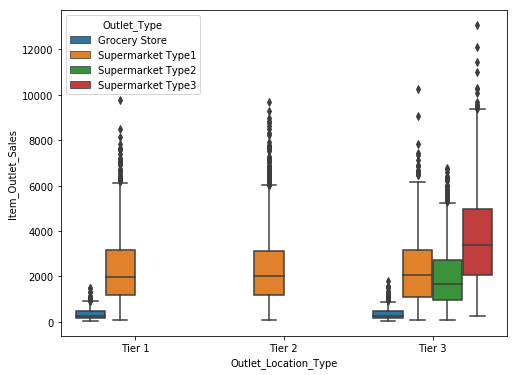

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(8,6))
sns.boxplot(y='Item_Outlet_Sales',hue='Outlet_Type',x='Outlet_Location_Type',data=data)

In [ ]:
data[data.Outlet_Size.isnull()]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
8,b,Supermarket Type1,Tier 2,NaN,2002,OUT045,Frozen Foods,1076.5986
9,c,Supermarket Type1,Tier 2,NaN,2007,OUT017,Frozen Foods,4710.5350
25,a,Supermarket Type1,Tier 2,NaN,2007,OUT017,Household,838.9080
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
30,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,163.7868
33,b,Supermarket Type1,Tier 2,NaN,2002,OUT045,Breads,2174.5028
45,c,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,358.2004
46,c,Supermarket Type1,Tier 2,NaN,2002,OUT045,Health and Hygiene,2428.8384
47,d,Supermarket Type1,Tier 2,NaN,2002,OUT045,Canned,5815.0972


## One thing to observe is when OUTLET_TYPE = supermarket type 1 and OUTLET_LOCATION_TYPE is Tier 2 then outlet size is null furthermore when OUTLET_TYPE = Grocery store and OUTLET_LOCATION_TYPE is Tier 3 then outlet size is always null 

In [ ]:
data.groupby('Outlet_Type').get_group('Grocery Store')['Outlet_Location_Type'].value_counts()

Tier 3    555
Tier 1    528
Tier 2      0
Name: Outlet_Location_Type, dtype: int64

In [ ]:
data.groupby('Outlet_Type').get_group('Grocery Store')

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
23,b,Grocery Store,Tier 1,Small,1985,OUT019,Baking Goods,214.3876
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
29,a,Grocery Store,Tier 1,Small,1985,OUT019,Canned,125.8362
30,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,163.7868
45,c,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,358.2004
49,c,Grocery Store,Tier 1,Small,1985,OUT019,Dairy,780.3176
59,c,Grocery Store,Tier 1,Small,1985,OUT019,Canned,892.1720
63,a,Grocery Store,Tier 1,Small,1985,OUT019,Frozen Foods,147.8076
65,c,Grocery Store,Tier 3,NaN,1998,OUT010,Snack Foods,184.4266


In [ ]:
data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [ ]:
(data.Outlet_Identifier=='OUT010').value_counts()

False    7968
True      555
Name: Outlet_Identifier, dtype: int64

In [ ]:
data.groupby('Outlet_Size').Outlet_Identifier.value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT019               528
Name: Outlet_Identifier, dtype: int64

## Tier 1 have small and medium size shop. Tier 2 have small and (missing 1) type shop. Tier 3 have 2-medium and 1 high and (missing 2) shop
## Tier 2 will have medium size shop in missing 1 and Tier 3 will be high or medium size shop

In [ ]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [ ]:
data.Outlet_Size=data.apply(func,axis=1)

## Now lets checkout OUTLIERS 

In [ ]:
data.head()

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
0,d,Supermarket Type1,Tier 1,d,1999,OUT049,Dairy,3735.1380
1,a,Supermarket Type2,Tier 3,a,2009,OUT018,Soft Drinks,443.4228
2,c,Supermarket Type1,Tier 1,c,1999,OUT049,Meat,2097.2700
3,c,Grocery Store,Tier 3,c,1998,OUT010,Fruits and Vegetables,732.3800
4,a,Supermarket Type1,Tier 3,a,1987,OUT013,Household,994.7052


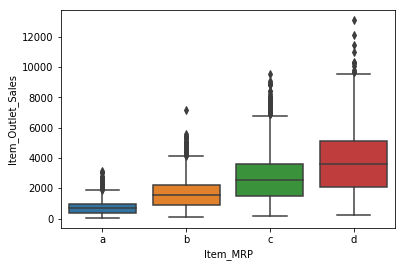

In [ ]:
sns.boxplot(x='Item_MRP',y='Item_Outlet_Sales',data=data)

In [ ]:
data[data.Item_MRP=='b'].Item_Outlet_Sales.max()

7158.6816

In [ ]:
data[data.Item_Outlet_Sales==7158.6816]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
7737,d,Supermarket Type3,Tier 3,d,1985,OUT027,Breads,7158.6816
7796,b,Supermarket Type3,Tier 3,b,1985,OUT027,Household,7158.6816


In [ ]:
data=data.drop(index=7796)
data.groupby('Item_MRP').get_group('b')['Item_Outlet_Sales'].max()

5582.733

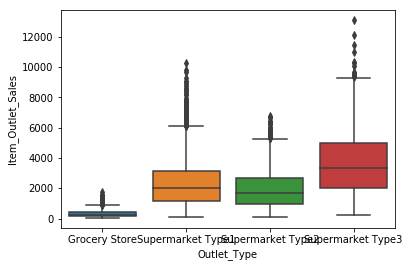

In [ ]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)

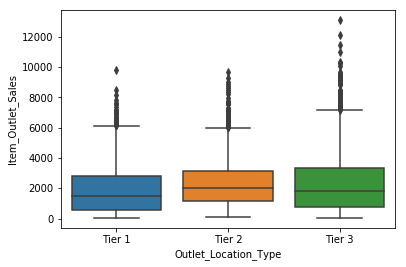

In [ ]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data)

In [ ]:
data[data.Outlet_Location_Type=='Tier 1'].Item_Outlet_Sales.max()

9779.9362

In [ ]:
data[data['Item_Outlet_Sales']==9779.9362]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
4289,d,Supermarket Type1,Tier 1,d,1997,OUT046,Health and Hygiene,9779.9362


In [ ]:
data=data.drop(index=4289)

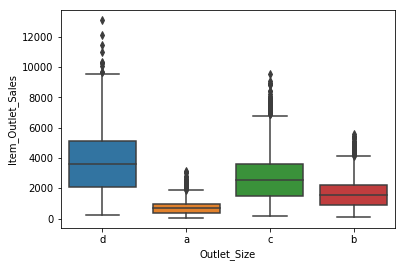

In [ ]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data)

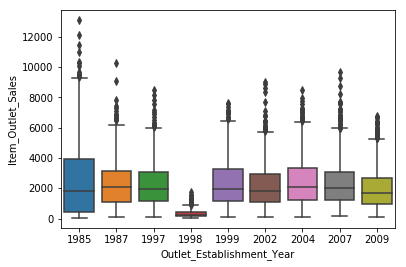

In [ ]:
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data)

In [ ]:
data.Outlet_Establishment_Year=data.Outlet_Establishment_Year.astype('category')
data_label=data.Item_Outlet_Sales
data_dummy=pd.get_dummies(data.iloc[:,0:6])

In [ ]:
data_dummy['Item_Outlet_Sales']=data_label

In [ ]:
data_dummy.shape

(8521, 35)

# Now we are ready to apply ML algorithms

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train,test = train_test_split(data_dummy,test_size=0.20,random_state=2019)

In [ ]:
train.shape , test.shape

((6816, 35), (1705, 35))

In [ ]:
train_label=train['Item_Outlet_Sales']
test_label=test['Item_Outlet_Sales']
del train['Item_Outlet_Sales']
del test['Item_Outlet_Sales']

# Applying Linear Regression 


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(train,train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
predict_lr=lr.predict(test)

In [ ]:
mse=mean_squared_error(test_label,predict_lr)

In [ ]:
lr_score=np.sqrt(mse)

In [ ]:
lr_score

1169.689692319826

# Cross Val for Linear Regression

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score=cross_val_score(lr,train,train_label,cv=10,scoring='neg_mean_squared_error')

In [ ]:
lr_score_cross=np.sqrt(-score)

In [ ]:
np.mean(lr_score_cross),np.std(lr_score_cross)

(1149.3370256048793, 31.845285160258655)

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.05,solver='cholesky')
r.fit(train,train_label)
predict_r=r.predict(test)
mse=mean_squared_error(test_label,predict_r)
r_score=np.sqrt(mse)
r_score

1170.8362071061267

# Cross Val Ridge

In [ ]:
r=Ridge(alpha=0.05,solver='cholesky')
score=cross_val_score(r,train,train_label,cv=10,scoring='neg_mean_squared_error')
r_score_cross=np.sqrt(-score)
np.mean(r_score_cross),np.std(r_score_cross)

(1148.0004939635598, 33.21382895301164)

# LASSO

In [ ]:
from sklearn.linear_model import Lasso
l=Lasso(alpha=0.01)
l.fit(train,train_label)
predict_l=l.predict(test)
mse=mean_squared_error(test_label,predict_l)
l_score=np.sqrt(mse)
l_score

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1170.8379343600718

# Cross VAl LAsso

In [ ]:
l=Lasso(alpha=0.01)
score=cross_val_score(l,train,train_label,cv=10,scoring='neg_mean_squared_error')
l_score_cross=np.sqrt(-score)
np.mean(l_score_cross),np.std(l_score_cross)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

(1148.0004285351881, 33.216017705722805)

# Elastic NEt

In [ ]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=0.01,l1_ratio=0.5)
en.fit(train,train_label)
predict_r=en.predict(test)
mse=mean_squared_error(test_label,predict_r)
en_score=np.sqrt(mse)
en_score

1171.9700046424412

# Cross val Elastic

In [ ]:
en=ElasticNet(alpha=0.01,l1_ratio=0.5)
score=cross_val_score(en,train,train_label,cv=10,scoring='neg_mean_squared_error')
en_score_cross=np.sqrt(-score)
np.mean(en_score_cross),np.std(en_score_cross)

(1148.1235514055243, 33.77950158582523)

# Stochastic gradient

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(penalty='l2',n_iter=100,alpha=0.05)
sgd.fit(train,train_label)
predict_r=sgd.predict(test)
mse=mean_squared_error(test_label,predict_r)
sgd_score=np.sqrt(mse)
sgd_score

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


1192.490985858396

# Cross Val Stochastic Gradient

In [ ]:
sgd=SGDRegressor(penalty='l2',n_iter=100,alpha=0.05)
score=cross_val_score(sgd,train,train_label,cv=10,scoring='neg_mean_squared_error')
sgd_score_cross=np.sqrt(-score)
np.mean(sgd_score_cross),np.std(sgd_score_cross)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: 

(1162.0275043789338, 37.50764096471804)

# SVR

In [ ]:
from sklearn.svm import SVR
svm=SVR(epsilon=15,kernel='linear')
svm.fit(train,train_label)
predict_r=svm.predict(test)
mse=mean_squared_error(test_label,predict_r)
svm_score=np.sqrt(mse)
svm_score

1372.7850836640566

# Cross VAl SVR

In [ ]:
svm=SVR(epsilon=15,kernel='linear')
score=cross_val_score(svm,train,train_label,cv=10,scoring='neg_mean_squared_error')
svm_score_cross=np.sqrt(-score)
np.mean(svm_score_cross),np.std(svm_score_cross)

(1331.8065213221926, 44.931011641419566)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(train,train_label)
predict_r=dtr.predict(test)
mse=mean_squared_error(test_label,predict_r)
dtr_score=np.sqrt(mse)
dtr_score

1123.1955839571694

# Cross Val Decision Tree

In [ ]:
dtr=DecisionTreeRegressor()
score=cross_val_score(dtr,train,train_label,cv=10,scoring='neg_mean_squared_error')
dtr_score_cross=np.sqrt(-score)
np.mean(dtr_score_cross),np.std(dtr_score_cross)

(1097.216824037842, 32.98894477916784)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(train,train_label)
predict_r=rf.predict(test)
mse=mean_squared_error(test_label,predict_r)
rf_score=np.sqrt(mse)
rf_score

1122.579295472768

# Cross Val RandomForest

In [ ]:
rf=RandomForestRegressor()
score=cross_val_score(rf,train,train_label,cv=10,scoring='neg_mean_squared_error')
rf_score_cross=np.sqrt(-score)
np.mean(rf_score_cross),np.std(rf_score_cross)

(1096.5414333335932, 33.176080944173684)

# Bagging Regressoion

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
br=BaggingRegressor(max_samples=70)

In [ ]:
br.fit(train,train_label)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=70,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [ ]:
score=br.predict(test)

In [ ]:
br_score=mean_squared_error(test_label,score)

In [ ]:
br_score=np.sqrt(br_score)
br_score

1164.0329226884262

# Cross Val Bagging

In [ ]:
br=BaggingRegressor()
score=cross_val_score(br,train,train_label,cv=10,scoring='neg_mean_squared_error')
br_score_cross=np.sqrt(-score)
np.mean(br_score_cross),np.std(br_score_cross)

(1097.4058553193856, 31.892528113844367)

# ADAPTIVE BOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(train,train_label)
g=ada.predict(test)
ada_score=mean_squared_error(test_label,g)
ada_score=np.sqrt(ada_score)
ada_score

1200.8521269141431

# Cross val for ADA BOOST

In [ ]:
ada=AdaBoostRegressor()
score=cross_val_score(ada,train,train_label,cv=10,scoring='neg_mean_squared_error')
ada_score_cross=np.sqrt(-score)
np.mean(ada_score_cross),np.std(ada_score_cross)

(1175.7017935039205, 29.973113222793405)

# Gradient BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(train,train_label)
p=gbr.predict(test)
gb_score=mean_squared_error(test_label,p)
gb_score=np.sqrt(gb_score)
gb_score

1122.6951622673103

# Cross Val for Gb

In [ ]:
gb=GradientBoostingRegressor()
score=cross_val_score(gb,train,train_label,cv=10,scoring='neg_mean_squared_error')
gb_score_cross=np.sqrt(-score)
np.mean(gb_score_cross),np.std(gb_score_cross)

(1096.661955906873, 33.23199448477199)

# Dataframe


In [ ]:
name=['Linear Regression','Linear Regression CV','Ridge Regression','Ridge Regression CV','Lasso Regression',
     'Lasso Regression CV','Elastic Net Regression','Elastic Net Regression CV','SGD Regression','SGD Regression CV',
     'SVM','SVM CV','Decision Tree','Decision Tree Regression','Random Forest','Random Forest CV','Ada Boost','Ada Boost CV',
     'Bagging','Bagging CV','Gradient Boost','Gradient Boost CV']

In [ ]:
go=pd.DataFrame({'RMSE':[lr_score,lr_score_cross,r_score,r_score_cross,l_score,l_score_cross,en_score,en_score_cross,
                     sgd_score,sgd_score_cross,svm_score,svm_score_cross,dtr_score,dtr_score_cross,rf_score,rf_score_cross,
                     ada_score,ada_score_cross,br_score,br_score_cross,gb_score,gb_score_cross]},index=name)

In [ ]:
go['RMSE']=go.applymap(lambda x: x.mean())

In [ ]:
go.RMSE.sort_values()

Random Forest CV             1096.541433
Gradient Boost CV            1096.661956
Decision Tree Regression     1097.216824
Bagging CV                   1097.405855
Random Forest                1122.579295
Gradient Boost               1122.695162
Decision Tree                1123.195584
Lasso Regression CV          1148.000429
Ridge Regression CV          1148.000494
Elastic Net Regression CV    1148.123551
Linear Regression CV         1149.337026
SGD Regression CV            1162.027504
Bagging                      1164.032923
Linear Regression            1169.689692
Ridge Regression             1170.836207
Lasso Regression             1170.837934
Elastic Net Regression       1171.970005
Ada Boost CV                 1175.701794
SGD Regression               1192.490986
Ada Boost                    1200.852127
SVM CV                       1331.806521
SVM                          1372.785084
Name: RMSE, dtype: float64

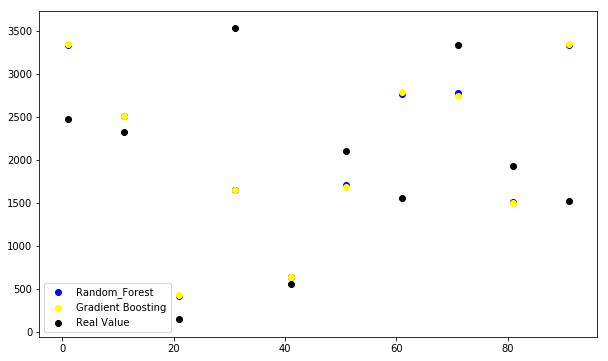

In [ ]:
fig=plt.figure(figsize=(10,6))
plt.scatter(np.arange(1,100,10),predict_r[0:100:10],color='blue')
plt.scatter(np.arange(1,100,10),p[0:100:10],color='yellow')
plt.scatter(np.arange(1,100,10),test_label[0:100:10],color='black')
plt.legend(['Random_Forest','Gradient Boosting','Real Value'])


# It seems like Gradient Boosting doing better than others
# So lets Do grid search on to tune hyper parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gb=GradientBoostingRegressor(max_depth=7,n_estimators=200,learning_rate=0.01)
param=[{'min_samples_split':[5,9,13],'max_leaf_nodes':[3,5,7,9],'max_features':[8,10,15,18]}]
gs=GridSearchCV(gb,param,cv=5,scoring='neg_mean_squared_error')
gs.fit(train,train_label)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samp...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'min_samples_split': [5, 9, 13], 'max_leaf_nodes': [3, 5, 7, 9], 'max_features': [8, 10, 15, 18]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [ ]:
gs.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=7, max_features=18,
             max_leaf_nodes=9, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=13, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gb=gs.best_estimator_

# Now Train our model on Training Data

In [ ]:
total=pd.concat([train,test],axis=0,ignore_index=True)

In [ ]:
total_label=pd.concat([train_label,test_label],axis=0,ignore_index=True)

In [ ]:
total_label.shape,total.shape

((8521,), (8521, 34))

In [ ]:
gb.fit(total,total_label)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=7, max_features=18,
             max_leaf_nodes=9, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=13, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

# TEST IMPORTING

In [ ]:
test=pd.read_csv('../input/Test.csv')

In [ ]:
test.shape

(5681, 11)

# Test Data Preprocessing

In [ ]:
attributes=['Item_MRP',
 'Outlet_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Establishment_Year',
 'Outlet_Identifier',
 'Item_Type']

In [ ]:
test=test[attributes]

In [ ]:
test.shape

(5681, 7)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
Item_MRP                     5681 non-null float64
Outlet_Type                  5681 non-null object
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Identifier            5681 non-null object
Item_Type                    5681 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 310.8+ KB


In [ ]:
test.Item_MRP=pd.cut(test.Item_MRP,bins=[25,75,140,205,270],labels=['a','b','c','d'],right=True)
test.Item_Type=test.Item_Type.astype('category')
test.Outlet_Size=test.Outlet_Size.astype('category')
test.Outlet_Identifier=test.Outlet_Identifier.astype('category')
test.Outlet_Establishment_Year=test.Outlet_Establishment_Year.astype('int64')
test.Outlet_Type=test.Outlet_Type.astype('category')
test.Outlet_Location_Type=test.Outlet_Location_Type.astype('category')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
Item_MRP                     5681 non-null category
Outlet_Type                  5681 non-null category
Outlet_Size                  4075 non-null category
Outlet_Location_Type         5681 non-null category
Outlet_Establishment_Year    5681 non-null int64
Outlet_Identifier            5681 non-null category
Item_Type                    5681 non-null category
dtypes: category(6), int64(1)
memory usage: 79.5 KB


In [ ]:
test.Outlet_Establishment_Year=test.Outlet_Establishment_Year.astype('category')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
Item_MRP                     5681 non-null category
Outlet_Type                  5681 non-null category
Outlet_Size                  4075 non-null category
Outlet_Location_Type         5681 non-null category
Outlet_Establishment_Year    5681 non-null category
Outlet_Identifier            5681 non-null category
Item_Type                    5681 non-null category
dtypes: category(7)
memory usage: 41.0 KB


In [ ]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [ ]:
test.Outlet_Size=test.apply(func,axis=1)

In [ ]:
test_dummy=pd.get_dummies(test.iloc[:,0:6])

In [ ]:
test_dummy.head()

,Item_MRP_a,Item_MRP_b,Item_MRP_c,Item_MRP_d,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_a,Outlet_Size_b,Outlet_Size_c,Outlet_Size_d,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# Now predict price of test data with our ML Model

In [ ]:
predict=gb.predict(test_dummy)

In [ ]:
predict.shape

(5681,)

In [ ]:
sample=pd.read_csv('../input/Submission.csv')

In [ ]:
sample.head()

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1636.244023
1,1,FDW14,OUT017,1409.355910
2,2,NCN55,OUT010,710.594286
3,3,FDQ58,OUT017,2355.184955
4,4,FDY38,OUT027,5857.916205


In [ ]:
del sample['Item_Outlet_Sales']

In [ ]:
df=pd.DataFrame({'Item_Outlet_Sales':predict})
corr_ans=pd.concat([sample,df],axis=1)
del corr_ans['Unnamed: 0']
corr_ans

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1741.433092
1,FDW14,OUT017,2136.276088
2,NCN55,OUT010,763.301211
3,FDQ58,OUT017,2683.547449
4,FDY38,OUT027,5116.969667
5,FDH56,OUT046,1741.433092
6,FDL48,OUT018,2134.489892
7,FDC48,OUT027,3881.851225
8,FDN33,OUT045,2136.276088
9,FDA36,OUT017,2683.547449


In [ ]:
corr_ans.to_csv('correct.csv',index=None)

# Feel free to give your suggestions and don't forget to give upvote :)